## start

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import os
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] # 用黑体显示中文
def toMarkdown(x):
    s=format(x,'.5e')
    l=s.split('e')
    l[1]=str(int(l[1]))
    return l[0]+'\\times10^{'+l[1]+'}'

## 1.单摆测量重力加速度
平均数 A类不确定度

In [3]:
df = pd.read_csv('单摆.csv',index_col=0,header=0)
a=[0]*3
b=[0]*3
k=0
for i in df.index:
    for j in df.columns:
        a[k]+=df.loc[i][j]/5.0
    k+=1
   
k=0
for i in df.index:
    for j in df.columns:
        b[k]+=(df.loc[i][j]-a[k])**2/20
    k+=1
print(a)
for i in range(3):
    b[i]=b[i]**0.5*2.78
print(b)
#计算A类不确定度 平均数

[np.float64(20.016), np.float64(71.96600000000001), np.float64(85.72200000000001)]
[np.float64(0.011119999999999764), np.float64(0.05019420683704431), np.float64(0.06302695931108011)]


## 2.时间测量中随机误差的分布规律
##### 基础数据

In [4]:
def P(x,a_bar,sigma):
    return 1/(math.sqrt(2*math.pi)*sigma)*math.exp(-(x-a_bar)**2/(2*(sigma**2)))

f=open('时间.in','r')
n=200
a=[0]*(n+10)
mn=10
mx=0
a_bar=0
for i in range(1,n+1):
    a[i]=float(f.readline())
    mn=min(a[i],mn)
    mx=max(a[i],mx)
    a_bar+=a[i]/n
print('平均值:',a_bar)
print('最大值:',mx)
print('最小值:',mn)
sigma=sum([(a[i]-a_bar)**2 for i in range(1,n+1)])/(n-1)
sigma=sigma**0.5
print('方差:',sum([(a[i]-a_bar)**2 for i in range(1,n+1)])/(n-1))
print('标准差:',sigma)
print('极差:',mx-mn)


平均值: 3.0937999999999994
最大值: 3.48
最小值: 2.76
方差: 0.01828498492462312
标准差: 0.13522198388066609
极差: 0.7200000000000002


##### 计算分段 统计频率

In [5]:
# pf=pd.DataFrame(a[1:n+1])
b=[0]*14
b[0]=2.76+0.03
print("[",format(b[0]-0.03,'.2f'),",",format(b[0]+0.03,'.2f'),'],',end='')
for i in range(1,13):
    b[i]=b[i-1]+0.06
    print("(",format(b[i]-0.03,'.2f'),",",format(b[i]+0.03,'.2f'),'],',end='')

cnt=[0]*14
p=[0]*14
sigm=[0]*4
for i in range(1,n+1):
    for j in range(12):
        if b[j]-0.03<a[i]<=b[j]+0.03:
            cnt[j]+=1
        if b[j]-0.03==a[i] and j==0:
            cnt[j]+=1

for i in range(12):#下一行输出markdown表格格式
    print("|$(",format(b[i]-0.03,'.2f'),",",format(b[i]+0.03,'.2f'),']$|$',
          cnt[i],'$|$',format(cnt[i]/n,'.2f'),'$|$',format(cnt[i]/(n*0.06),'.2f'),
          '$|$',format(P(b[i],a_bar,sigma),'.2f'),'$|')

f.close()



[ 2.76 , 2.82 ],( 2.82 , 2.88 ],( 2.88 , 2.94 ],( 2.94 , 3.00 ],( 3.00 , 3.06 ],( 3.06 , 3.12 ],( 3.12 , 3.18 ],( 3.18 , 3.24 ],( 3.24 , 3.30 ],( 3.30 , 3.36 ],( 3.36 , 3.42 ],( 3.42 , 3.48 ],( 3.48 , 3.54 ],|$( 2.76 , 2.82 ]$|$ 3 $|$ 0.01 $|$ 0.25 $|$ 0.24 $|
|$( 2.82 , 2.88 ]$|$ 2 $|$ 0.01 $|$ 0.17 $|$ 0.58 $|
|$( 2.88 , 2.94 ]$|$ 14 $|$ 0.07 $|$ 1.17 $|$ 1.17 $|
|$( 2.94 , 3.00 ]$|$ 16 $|$ 0.08 $|$ 1.33 $|$ 1.94 $|
|$( 3.00 , 3.06 ]$|$ 19 $|$ 0.10 $|$ 1.58 $|$ 2.64 $|
|$( 3.06 , 3.12 ]$|$ 16 $|$ 0.08 $|$ 1.33 $|$ 2.95 $|
|$( 3.12 , 3.18 ]$|$ 21 $|$ 0.10 $|$ 1.75 $|$ 2.71 $|
|$( 3.18 , 3.24 ]$|$ 18 $|$ 0.09 $|$ 1.50 $|$ 2.04 $|
|$( 3.24 , 3.30 ]$|$ 22 $|$ 0.11 $|$ 1.83 $|$ 1.26 $|
|$( 3.30 , 3.36 ]$|$ 5 $|$ 0.03 $|$ 0.42 $|$ 0.64 $|
|$( 3.36 , 3.42 ]$|$ 2 $|$ 0.01 $|$ 0.17 $|$ 0.27 $|
|$( 3.42 , 3.48 ]$|$ 3 $|$ 0.01 $|$ 0.25 $|$ 0.09 $|


##### 统计$\sigma$分布

In [6]:
for i in range(12):
    cnt[i]=cnt[i]/(n*0.06)
    p[i]=P(b[i],a_bar,sigma)
for i in range(1,n+1):
    for j in range(1,4):
        if(abs(a[i]-a_bar)<=j*sigma):
            sigm[j]+=1
for i in range(1,4):
    print(i,sigm[i],sigm[i]/n)
print('A类不确定度:',sigma*1.96/(n**0.5))
#pf.to_csv('时间.csv')


1 133 0.665
2 191 0.955
3 200 1.0
A类不确定度: 0.01874081082643333


##### 画图

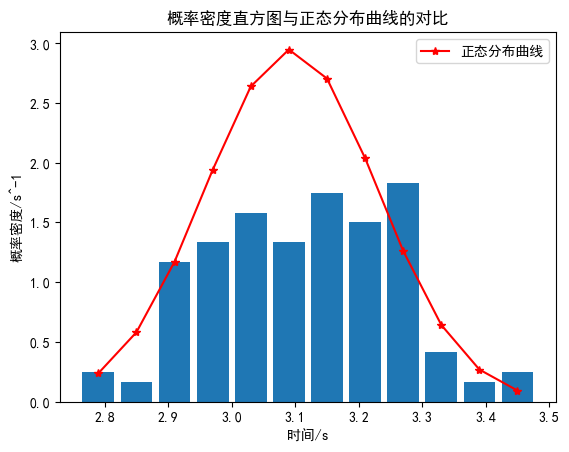

In [7]:
plt.bar(b[0:12],cnt[0:12],width=0.05)
plt.plot(b[0:12],p[0:12],color='red',label='正态分布曲线',marker='*')
plt.xlabel('时间/s')
plt.ylabel('概率密度/s^-1')
plt.title('概率密度直方图与正态分布曲线的对比')
plt.legend()
plt.show()

## 3.密立根油滴实验


##### 基础数据处理

In [8]:
f=open('密立根.in','r')
n=5
t=[0]*(n+10)
U=[0]*(n+10)
for i in range(1,n+1):
    s=f.readline().split()
    # print(s)
    U[i]=float(s[0])
    t[i]=float(s[1])+float(s[2])+float(s[3])
    t[i]=t[i]/3.0
    print("|$",i,"$|$",U[i],"$|$",s[1],"$|$",s[2],"$|$",s[3],"$|$",format(t[i],'.2f'),"$|")
f.close()

|$ 1 $|$ 129.0 $|$ 4 $|$ 4.28 $|$ 4.12 $|$ 4.13 $|
|$ 2 $|$ 98.0 $|$ 13.4 $|$ 13.58 $|$ 13.31 $|$ 13.43 $|
|$ 3 $|$ 152.0 $|$ 14.68 $|$ 14.61 $|$ 14.46 $|$ 14.58 $|
|$ 4 $|$ 147.0 $|$ 14.86 $|$ 15.44 $|$ 15.25 $|$ 15.18 $|
|$ 5 $|$ 83.0 $|$ 31.51 $|$ 32.45 $|$ 31.34 $|$ 31.77 $|


##### 计算元电荷

In [9]:
e0=1.602e-19
q=[0]*(n+10)
m=[0]*(n+10)
e=[0]*(n+10)
e_bar=0
for i in range(1,n+1):
    q[i]=1.022e-14/(U[i]*((1+0.02193*t[i]**0.5)*t[i])**1.5)
    m[i]=round(q[i]/e0)
    e[i]=q[i]/m[i]
    e_bar+=e[i]
    print("=\\frac{1.022\\times 10^{-14}}{",format(U[i],'.2f'),"\\times[(1+0.02193\\sqrt{",format(t[i],'.2f'),"})",format(t[i],'.2f'),"]^{3 \\over 2}}=",toMarkdown((q[i])))
    print("=[\\frac{",toMarkdown((q[i])),"}{",toMarkdown((e0)),"}]\\approx",m[i])
    print("=\\frac{",toMarkdown((q[i])),"}{",m[i],"}=",toMarkdown((e[i])))
e_bar=e_bar/n
for i in range(1,n+1):
    print(toMarkdown((e[i])),"+")
print('平均值:',e_bar)
print("E=\\frac{|",toMarkdown((e_bar)),"-",toMarkdown((e0)),"|}{",toMarkdown((e0)),"} \\times 100 \\%=",abs(e_bar-e0)/e0*100,'%')
print('误差',abs(e_bar-e0)/e0*100,'%')

=\frac{1.022\times 10^{-14}}{ 129.00 \times[(1+0.02193\sqrt{ 4.13 }) 4.13 ]^{3 \over 2}}= 8.83069\times10^{-18}
=[\frac{ 8.83069\times10^{-18} }{ 1.60200\times10^{-19} }]\approx 55
=\frac{ 8.83069\times10^{-18} }{ 55 }= 1.60558\times10^{-19}
=\frac{1.022\times 10^{-14}}{ 98.00 \times[(1+0.02193\sqrt{ 13.43 }) 13.43 ]^{3 \over 2}}= 1.88692\times10^{-18}
=[\frac{ 1.88692\times10^{-18} }{ 1.60200\times10^{-19} }]\approx 12
=\frac{ 1.88692\times10^{-18} }{ 12 }= 1.57244\times10^{-19}
=\frac{1.022\times 10^{-14}}{ 152.00 \times[(1+0.02193\sqrt{ 14.58 }) 14.58 ]^{3 \over 2}}= 1.07012\times10^{-18}
=[\frac{ 1.07012\times10^{-18} }{ 1.60200\times10^{-19} }]\approx 7
=\frac{ 1.07012\times10^{-18} }{ 7 }= 1.52874\times10^{-19}
=\frac{1.022\times 10^{-14}}{ 147.00 \times[(1+0.02193\sqrt{ 15.18 }) 15.18 ]^{3 \over 2}}= 1.03912\times10^{-18}
=[\frac{ 1.03912\times10^{-18} }{ 1.60200\times10^{-19} }]\approx 6
=\frac{ 1.03912\times10^{-18} }{ 6 }= 1.73187\times10^{-19}
=\frac{1.022\times 10^{-14}}{ 8

##### 非markdown格式输出部分

In [10]:
for i in range(1,n+1):
    print(i,' ',t[i],' ',U[i],' ',q[i],' ',m[i],' ',e[i])

1   4.133333333333334   129.0   8.830694433016935e-18   55   1.605580806003079e-19
2   13.43   98.0   1.88692205538989e-18   12   1.5724350461582417e-19
3   14.583333333333334   152.0   1.0701151176860556e-18   7   1.528735882408651e-19
4   15.183333333333332   147.0   1.0391229595911427e-18   6   1.7318715993185712e-19
5   31.76666666666667   83.0   5.774265534064899e-19   4   1.4435663835162248e-19


##### 快速计算器

In [11]:
# i=6
#  U[i]=float(input('输入电压:'))
#  t[i]=float(input('输入时间:'))
# q[i]=1.022e-14/(U[i]*((1+0.02193*t[i]**0.5)*t[i])**1.5)
# m[i]=round(q[i]/e0)
# e[i]=q[i]/m[i]
# print(i,' ',t[i],' ',U[i],' ',q[i],' ',m[i],' ',e[i])

# 氢氘光谱
##### 基础数据处理


In [12]:
f=open('氢氘.in','r')
n=9
Hg=[0]*(n+10)
HgTrue=[0]*(n+10)
s=f.readline().split()
for i in range(1,10):
    Hg[i]=float(s[i-1])
    print("$",format(Hg[i],".2f"),"$|",end='')
print()
s=f.readline().split()
for i in range(1,10):
    HgTrue[i]=float(s[i-1])
    print("$",format(HgTrue[i],".2f"),"$|",end='')
print()
H=[0]*(n+10)
D=[0]*(n+10)

s=f.readline().split()
for i in range(3,6):
    H[i]=float(s[i-3])
    print("$",format(H[i],".2f"),"$|",end='')
print()
s=f.readline().split()
for i in range(3,6):
    D[i]=float(s[i-3])
    print("$",format(D[i],".2f"),"$|",end='')
print()
f.close()

$ 364.85 $|$ 365.30 $|$ 366.10 $|$ 404.65 $|$ 407.65 $|$ 435.90 $|$ 546.50 $|$ 577.45 $|$ 579.60 $|
$ 365.02 $|$ 365.48 $|$ 366.30 $|$ 404.66 $|$ 407.78 $|$ 435.84 $|$ 546.07 $|$ 576.96 $|$ 579.07 $|
$ 657.63 $|$ 486.33 $|$ 434.07 $|
$ 657.44 $|$ 486.21 $|$ 433.95 $|


##### 计算拟合修正公式

1.3963 + 0.9967 \lambda_{Hg}^0


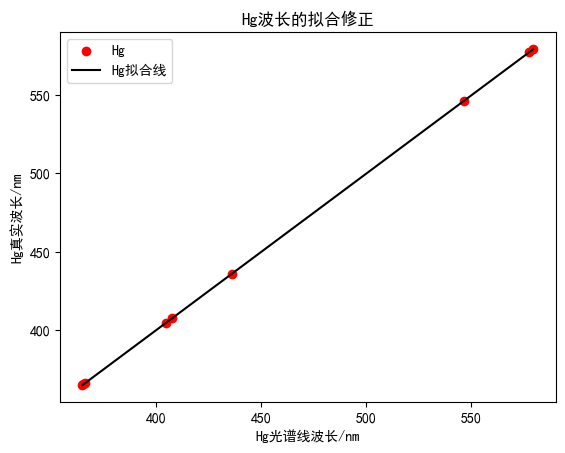

In [13]:
beta,apha= np.polyfit(Hg[1:10],HgTrue[1:10], 1)
print(format(apha,'.4f'),'+',format(beta,'.4f'),'\\lambda_{Hg}^0')
plt.scatter(Hg[1:10],HgTrue[1:10],label='Hg',color='red')
plt.plot(Hg[1:10],[apha+beta*i for i in Hg[1:10]], color='black', label='Hg拟合线')
plt.legend()
plt.xlabel('Hg光谱线波长/nm')
plt.ylabel('Hg真实波长/nm')
plt.title('Hg波长的拟合修正')
plt.show()

##### 修正$\lambda$

In [14]:
for i in range(3,6):
    print(format(apha,'.4f'),'+',format(beta,'.4f'),'\\times',format(H[i],'.2f'),'=',format(apha+beta*H[i],'.2f'))
    H[i]=apha+beta*H[i]
for i in range(3,6):
    print(format(apha,'.4f'),'+',format(beta,'.4f'),'\\times',format(D[i],'.2f'),'=',format(apha+beta*D[i],'.2f'))
    D[i]=apha+beta*D[i]


1.3963 + 0.9967 \times 657.63 = 656.85
1.3963 + 0.9967 \times 486.33 = 486.12
1.3963 + 0.9967 \times 434.07 = 434.03
1.3963 + 0.9967 \times 657.44 = 656.66
1.3963 + 0.9967 \times 486.21 = 486.00
1.3963 + 0.9967 \times 433.95 = 433.91


##### 计算$R_H$

In [15]:
RH=[0]*(n+10)
RH_bar=0
for i in range(3,6):
    RH[i]=1/(H[i]*1e-9*(1/2**2-1/i**2))
    print("\\frac{1}{",format(H[i],".2f"),"nm*(\\frac{1}{2^2}-\\frac{1}{",i,"^2})}=",format(RH[i],".2f"),"m^{-1}")
print("\\frac{",end='')
for i in range(3,6):
    RH_bar+=RH[i]
    print(format(RH[i],".2f"),'+',end='')
print("}{3}=",end='')
RH_bar=RH_bar/3.0
print(format(RH_bar,'.2f'),"m^{-1}")

\frac{1}{ 656.85 nm*(\frac{1}{2^2}-\frac{1}{ 3 ^2})}= 10961381.48 m^{-1}
\frac{1}{ 486.12 nm*(\frac{1}{2^2}-\frac{1}{ 4 ^2})}= 10971272.89 m^{-1}
\frac{1}{ 434.03 nm*(\frac{1}{2^2}-\frac{1}{ 5 ^2})}= 10971351.28 m^{-1}
\frac{10961381.48 +10971272.89 +10971351.28 +}{3}=10968001.89 m^{-1}


##### 计算$R_D$

In [16]:
RD=[0]*(n+10)
RD_bar=0
for i in range(3,6):
    RD[i]=1/(D[i]*1e-9*(1/2**2-1/i**2))
    print("\\frac{1}{",format(D[i],".2f"),"nm*(\\frac{1}{2^2}-\\frac{1}{",i,"^2})}=",format(RD[i],".2f"),"m^{-1}")
print("\\frac{",end='')
for i in range(3,6):
    RD_bar+=RD[i]
    print(format(RD[i],".2f"),'+',end='')
print("}{3}=",end='')
RD_bar=RD_bar/3.0
print(format(RD_bar,'.2f'),"m^{-1}")

\frac{1}{ 656.66 nm*(\frac{1}{2^2}-\frac{1}{ 3 ^2})}= 10964542.58 m^{-1}
\frac{1}{ 486.00 nm*(\frac{1}{2^2}-\frac{1}{ 4 ^2})}= 10973972.90 m^{-1}
\frac{1}{ 433.91 nm*(\frac{1}{2^2}-\frac{1}{ 5 ^2})}= 10974375.42 m^{-1}
\frac{10964542.58 +10973972.90 +10974375.42 +}{3}=10970963.64 m^{-1}


##### 计算${m_D \over m_H}$


In [17]:
m_H=1.6737e-27
m_e=9.1094e-31
ans=(RH_bar/RD_bar)/(1-m_H/m_e*(RD_bar/RH_bar-1))
print("\\frac{\\frac{",format(RH_bar,".2f"),"}{",format(RD_bar,".2f"),"}}{1-\\frac{",toMarkdown(m_H),"}{",toMarkdown(m_e),"}(\\frac{",format(RD_bar,".2f"),"}{",format(RH_bar,".2f"),"}-1)}=",toMarkdown(ans))

\frac{\frac{ 10968001.89 }{ 10970963.64 }}{1-\frac{ 1.67370\times10^{-27} }{ 9.10940\times10^{-31} }(\frac{ 10970963.64 }{ 10968001.89 }-1)}= 1.98416\times10^{0}


# 测量杨氏模量
##### 基础处理

In [18]:
f=open('杨氏.in','r')
n=8
r1=[0]*18
r2=[0]*18
r=[0]*18
bb=[0]*18

s=f.readline().split()
L=float(s[0])/100
l=float(s[1])/100
D=float(s[2])/100
g=9.7881
m=1.0
deltam=5e-3
deltaL=5e-2/100
deltaD=5e-2/100
deltal=5e-2/100
deltad=1e-3/1000
deltab=5e-2/100
for i in range(1,9):
    print("$",i,".00$|",end='')
print()
s=f.readline().split()
for i in range(1,9):
    r1[i]=float(s[i-1])
    print("$",format(r1[i],'.2f'),"$|",end='')
print()
s=f.readline().split()
for i in range(1,9):
    r2[i]=float(s[i-1])
    print("$",format(r2[i],'.2f'),"$|",end='')
print()
for i in range(1,9):
    r[i]=(r1[i]+r2[i])*0.5
    print("$",format(r[i],'.2f'),"$|",end='')
print()
s=f.readline().split()
dd=[0]*6
d=0
for i in range(6):
    dd[i]=float(s[i])
    d+=dd[i]
    print("$",format(dd[i],'.2f'),"$|",end='')
print()
d/=6
print("d=",format(d,'.4f'))
d/=1000


$ 1 .00$|$ 2 .00$|$ 3 .00$|$ 4 .00$|$ 5 .00$|$ 6 .00$|$ 7 .00$|$ 8 .00$|
$ 1.50 $|$ 2.19 $|$ 3.10 $|$ 3.78 $|$ 4.45 $|$ 5.09 $|$ 5.76 $|$ 6.41 $|
$ 1.85 $|$ 2.59 $|$ 3.29 $|$ 3.91 $|$ 4.56 $|$ 5.19 $|$ 5.79 $|$ 6.41 $|
$ 1.68 $|$ 2.39 $|$ 3.20 $|$ 3.84 $|$ 4.50 $|$ 5.14 $|$ 5.78 $|$ 6.41 $|
$ 0.60 $|$ 0.60 $|$ 0.60 $|$ 0.60 $|$ 0.60 $|$ 0.61 $|
d= 0.6018


##### 逐差法

In [19]:
b=0
for i in range(1,5):
    b+=(r[i+4]-r[i])/16
print("b=",format(b,'.4f'))
b/=100
E=(8*m*g*L*D)/(math.pi*b*d*d*l)
print("E=",toMarkdown(E))

k=((deltaD/D)**2+(deltaL/L)**2+(deltal/l)**2+(deltam/m)**2+(deltab/b)**2+(2*deltad/d)**2)**0.5
print("k=",format(k,'.4f'))
print("deltaE=",toMarkdown(E*k))


b= 0.6703
E= 1.68269\times10^{11}
k= 0.0751
deltaE= 1.26426\times10^{10}


##### 作图法

1.0866    0.6734


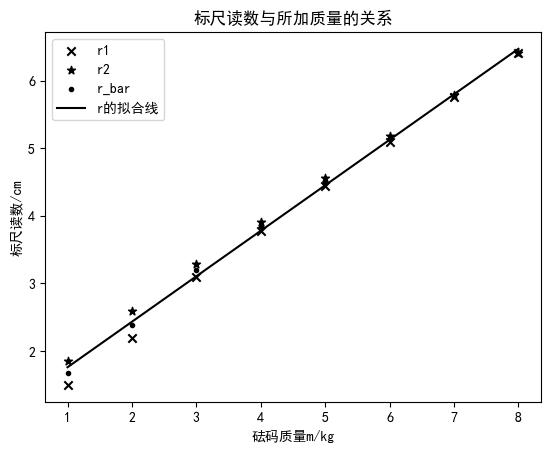

In [20]:
beta,apha= np.polyfit(range(1,9),r[1:9], 1)
print(format(apha,'.4f'),'  ',format(beta,'.4f'))

plt.scatter(range(1,9),r1[1:9],label='r1',color='black',marker="x")
plt.scatter(range(1,9),r2[1:9],label='r2',color='black',marker='*')
plt.scatter(range(1,9),r[1:9],label='r_bar',color='black',marker='.')
plt.plot(range(1,9),[apha+beta*i for i in range(1,9)], color='black', label='r的拟合线')
plt.legend()
plt.xlabel('砝码质量m/kg')
plt.ylabel('标尺读数/cm')
plt.title('标尺读数与所加质量的关系')
plt.show()

In [21]:
b=beta
print("b=",format(b,'.4f'))
b/=100
E=(8*m*g*L*D)/(math.pi*b*d*d*l)
print("E=",toMarkdown(E))

k=((deltaD/D)**2+(deltaL/L)**2+(deltal/l)**2+(deltam/m)**2+(deltab/b)**2+(2*deltad/d)**2)**0.5
print("k=",format(k,'.4f'))
print("deltaE=",toMarkdown(E*k))

b= 0.6734
E= 1.67499\times10^{11}
k= 0.0748
deltaE= 1.25281\times10^{10}


# 分光计
##### 基础数据处理

In [22]:
f=open('分光.in','r')
n=3
a1=[[0 for i in range(3)] for j in range(n+1)]
a2=[[0 for i in range(3)] for j in range(n+1)]
a3=[[0 for i in range(3)] for j in range(n+1)]
a4=[[0 for i in range(3)] for j in range(n+1)]
a5=[[0 for i in range(3)] for j in range(n+1)]
for i in range(0,3):
    s=f.readline().split()
    a1[0][i]=int(s[0])
    a1[1][i]=int(s[1])
    a2[0][i]=int(s[2])
    a2[1][i]=int(s[3])
    a3[0][i]=int(s[4])
    a3[1][i]=int(s[5])
    a4[0][i]=int(s[6])
    a4[1][i]=int(s[7])
    a5[0][i]=int(s[8])
    a5[1][i]=int(s[9])
    print("|$",i,"$|$",a1[0][i],"\\degree",a1[1][i],"\'$|$",
          a2[0][i],"\\degree",a2[1][i],"\'$|$",a3[0][i],"\\degree",a3[1][i],"\'$|$",
          a4[0][i],"\\degree",a4[1][i],"\'$|$",a5[0][i],"\\degree",a5[1][i],"\'$|")
f.close()


|$ 0 $|$ 85 \degree 35 '$|$ 265 \degree 31 '$|$ 205 \degree 33 '$|$ 25 \degree 31 '$|$ 119 \degree 59 '$|
|$ 1 $|$ 95 \degree 44 '$|$ 275 \degree 41 '$|$ 215 \degree 41 '$|$ 35 \degree 40 '$|$ 119 \degree 58 '$|
|$ 2 $|$ 95 \degree 43 '$|$ 275 \degree 41 '$|$ 215 \degree 40 '$|$ 35 \degree 39 '$|$ 119 \degree 57 '$|


# 迈克尔逊干涉仪
##### 基础数据处理

In [23]:
f=open('迈克尔.in','r')
s=f.readline().split()
a=[0]*12
b=[0]*12
ans=0
for i in range(12):
    a[i]=float(s[i])
    print("$",format(a[i],".5f"),"$|",end="")
print()
for i in range(6):
    b[i]=abs(a[i]-a[i+6])
    print("$",format(b[i],".5f"),"$|",end="")
    ans+=2*b[i]/(50*6*6)
print()
for i in range(6):
    print(format(b[i],".5f"),'+',end='')
print()
print(ans*1e6)
f.close()


$ 53.19452 $|$ 53.17833 $|$ 53.16242 $|$ 53.14618 $|$ 53.13011 $|$ 53.11424 $|$ 53.09802 $|$ 53.08212 $|$ 53.06639 $|$ 53.05052 $|$ 53.03460 $|$ 53.01933 $|
$ 0.09650 $|$ 0.09621 $|$ 0.09603 $|$ 0.09566 $|$ 0.09551 $|$ 0.09491 $|
0.09650 +0.09621 +0.09603 +0.09566 +0.09551 +0.09491 +
638.6888888888997


##### 计算不确定度

In [24]:
b_bar=sum(b)/6
ua=0
print(format(b_bar,".5f"))
for i in range(6):
    ua+=((b[i]-b_bar)**2)/(6*5)
    print("(",format(b[i],".5f"), "-", format(b_bar,".5f"), ")^2+",end="")
ua=ua**0.5
print()
print(toMarkdown(ua))
ub=(2*(0.00005**2))**0.5
print(toMarkdown(ub))
t=2.57
k=1.65
c=3**0.5
u=(k*ua*ua+k*ub*ub/c)**0.5
print(toMarkdown(u))
print(u*1e6)

print(toMarkdown(u*ans/b_bar))
print(u*ans*1e6/b_bar)

print((ans*1e6-632.8)/623.8*100)
    



0.09580
( 0.09650 - 0.09580 )^2+( 0.09621 - 0.09580 )^2+( 0.09603 - 0.09580 )^2+( 0.09566 - 0.09580 )^2+( 0.09551 - 0.09580 )^2+( 0.09491 - 0.09580 )^2+
2.31426\times10^{-4}
7.07107\times10^{-5}
3.05178\times10^{-4}
305.1777728689519
2.03452\times10^{-6}
2.0345184857930128
0.9440347689803967


# 示波器
##### 测量示波器自带方波信号的周期和幅度


In [25]:
fi=open('示波器.in','r')
t=[0]*3
l=[0]*3
s=fi.readline().split()
for i in range(3):
    t[i]=float(s[i])
    print("$",format(t[i],".2f"),"$|",end="")
print()
s=fi.readline().split()
for i in range(3):
    l[i]=float(s[i])
    print("$",format(l[i],".1f"),"$|",end="")
print()
for i in range(3):
    print("$",format(l[i]*t[i],".2f"),"$|",end="")
print()
for i in range(3):
    print("$",format(1000/(l[i]*t[i]),".2f"),"$|",end="")
print()

$ 0.10 $|$ 0.20 $|$ 0.50 $|
$ 10.4 $|$ 5.3 $|$ 2.1 $|
$ 1.04 $|$ 1.06 $|$ 1.05 $|
$ 961.54 $|$ 943.40 $|$ 952.38 $|


##### 幅值

$ 0.50 $|$ 1.00 $|$ 2.00 $|$ 2.50 $|$ 3.00 $|$ 3.50 $|
$ 0.1 $|$ 0.2 $|$ 0.5 $|$ 0.5 $|$ 0.5 $|$ 0.5 $|
$ 5.1 $|$ 5.1 $|$ 4.2 $|$ 5.2 $|$ 6.2 $|$ 7.3 $|
$ 0.51 $|$ 1.02 $|$ 2.10 $|$ 2.60 $|$ 3.10 $|$ 3.65 $|
-0.0013    1.0402


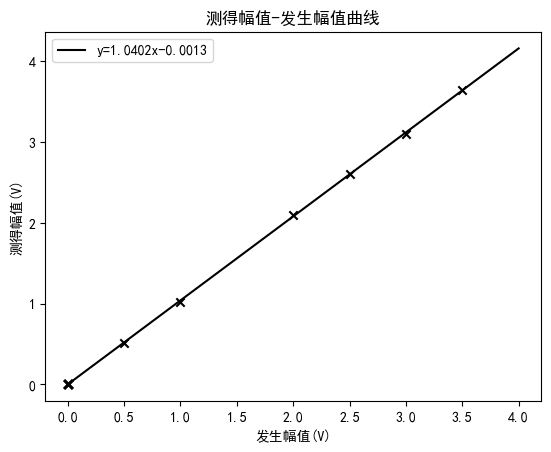

In [26]:
s=fi.readline().split()
v=[0]*17
v0=[0]*17
H=[0]*17
for i in range(6):
    v[i]=float(s[i])
    print("$",format(v[i],".2f"),"$|",end="")
print()
s=fi.readline().split()
for i in range(6):
    v0[i]=float(s[i])
    print("$",format(v0[i],".1f"),"$|",end="")
print()
s=fi.readline().split()
for i in range(6):
    H[i]=float(s[i])
    print("$",format(H[i],".1f"),"$|",end="")
print()
for i in range(6):
    v0[i]*=H[i]
    print("$",format(v0[i],".2f"),"$|",end="")
print()
beta,apha= np.polyfit(v, v0, 1)
print(format(apha,'.4f'),'  ',format(beta,'.4f'))

plt.scatter(v,v0,color='black',marker="x")
plt.plot(range(0,5),[apha+beta*i for i in range(0,5)], color='black',
         label="y="+format(beta,".4f")+"x"+format(apha,".4f"))
plt.legend()
plt.xlabel('发生幅值(V)')
plt.ylabel('测得幅值(V)')
plt.title('测得幅值-发生幅值曲线')
plt.show()

##### 时间

$ 200 $|$ 500 $|$ 1000 $|$ 2000 $|$ 5000 $|$ 10000 $|$ 20000 $|
$ 1.00 $|$ 0.50 $|$ 0.20 $|$ 0.10 $|$ 0.05 $|$ 0.02 $|$ 0.01 $|
$ 5.1 $|$ 4.1 $|$ 5.2 $|$ 5.1 $|$ 4.1 $|$ 5.0 $|$ 5.0 $|
$ 5.10 $|$ 2.05 $|$ 1.04 $|$ 0.51 $|$ 0.20 $|$ 0.10 $|$ 0.05 $|
$ 196.08 $|$ 487.80 $|$ 961.54 $|$ 1960.78 $|$ 4878.05 $|$ 10000.00 $|$ 20000.00 $|
-0.0114    0.9995


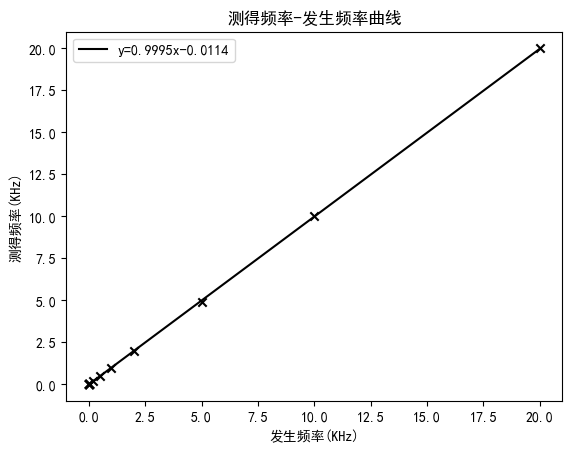

In [27]:
s=fi.readline().split()
f=[0]*17
f0=[0]*17
H=[0]*17
for i in range(7):
    f[i]=float(s[i])
    print("$",format(f[i],".0f"),"$|",end="")
    f[i]/=1000
s=fi.readline().split()
print()
for i in range(7):
    f0[i]=float(s[i])
    print("$",format(f0[i],".2f"),"$|",end="")
s=fi.readline().split()
print()
for i in range(7):
    H[i]=float(s[i])
    print("$",format(H[i],".1f"),"$|",end="")
print()
for i in range(7):
    f0[i]*=H[i]
    print("$",format(f0[i],".2f"),"$|",end="")
print()
for i in range(7):
    f0[i]=1000/f0[i]
    print("$",format(f0[i],".2f"),"$|",end="")
    f0[i]/=1000
print()
beta,apha= np.polyfit(f, f0, 1)
print(format(apha,'.4f'),'  ',format(beta,'.4f'))

plt.scatter(f,f0,color='black',marker="x")
plt.plot(range(0,21),[apha+beta*i for i in range(0,21)], color='black',
         label="y="+format(beta,".4f")+"x"+format(apha,".4f"))
plt.legend()
plt.xlabel('发生频率(KHz)')
plt.ylabel('测得频率(KHz)')
plt.title('测得频率-发生频率曲线')
plt.show()

# 热电偶
##### 基础数据处理

In [28]:
fi=open('热电偶.in','r')
t=[0]*9
u1=[0]*9
u2=[0]*9
s=fi.readline().split()
for i in range(9):
    t[i]=int(s[i])
    print("$",t[i],"$|",end="")
print()
s=fi.readline().split()
for i in range(9):
    u1[i]=float(s[i])
    print("$",format(u1[i],".2f"),"$|",end="")
print()
s=fi.readline().split()
for i in range(9):
    u2[i]=float(s[i])
    print("$",format(u2[i],".2f"),"$|",end="")

$ 30 $|$ 35 $|$ 40 $|$ 45 $|$ 50 $|$ 55 $|$ 60 $|$ 65 $|$ 70 $|
$ 1.80 $|$ 2.12 $|$ 2.43 $|$ 2.75 $|$ 3.07 $|$ 3.39 $|$ 3.71 $|$ 4.03 $|$ 4.36 $|
$ 1.77 $|$ 2.08 $|$ 2.39 $|$ 2.71 $|$ 3.03 $|$ 3.35 $|$ 3.67 $|$ 4.00 $|$ 4.31 $|

##### 作图

-0.121667    0.063900


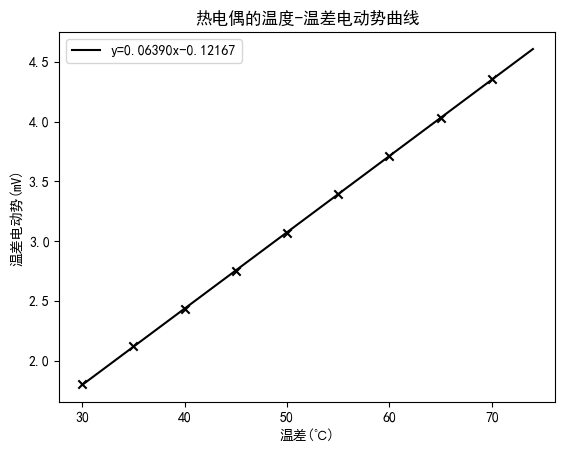

-0.152222    0.063733


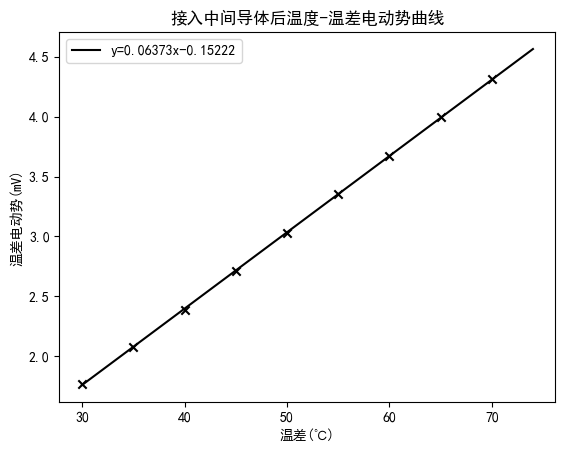

In [31]:
beta,apha= np.polyfit(t, u1, 1)
print(format(apha,'.6f'),'  ',format(beta,'.6f'))
plt.scatter(t,u1,color='black',marker="x")
plt.plot(range(30,75),[apha+beta*i for i in range(30,75)], color='black',
         label="y="+format(beta,".5f")+"x"+format(apha,".5f"))
plt.legend()
plt.xlabel('温差(℃)')
plt.ylabel('温差电动势(mV)')
plt.title('热电偶的温度-温差电动势曲线')
plt.show()
beta,apha= np.polyfit(t, u2, 1)
print(format(apha,'.6f'),'  ',format(beta,'.6f'))
plt.scatter(t,u2,color='black',marker="x")
plt.plot(range(30,75),[apha+beta*i for i in range(30,75)], color='black',
         label="y="+format(beta,".5f")+"x"+format(apha,".5f"))
plt.legend()
plt.xlabel('温差(℃)')
plt.ylabel('温差电动势(mV)')
plt.title('接入中间导体后温度-温差电动势曲线')
plt.show()